In [1]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import requests
import pandas as pd
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline 
sns.set('notebook')

import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Introduction to the Step Project
In this work the Ikea dataset will be used. This work will be conventionally divided into three parts:
1. EDA. Explorative data analysis will be performed on the initial dataset: we will check the shape, datatypes, columns and values. In other words - we will examine the given data thouroughly. 
2. Basic analysis and statistics. Data cleaning will also be performed in this step. 
3. Building models and forecasting the price.

In our work we will use:
- initial dataset 'ikea' for EDA;
- copy dataset 'ikea_ds' for analysis and statisctics. Some of data transformation and data cleaning will be performed on this dataset;
- subset 'subset_no1'. Main reason of this suset existence is the removing of duplicated values.
- dataset 'ikea_ds1', the copy of 'ikea_ds', but with filled in missing data. 

Descriptions and conclusions will be briefly given for each step as comments and markdowns. 

This project may be found on GitHub. Link: 
https://github.com/MarinaYurchenko/Python-Step-Project/tree/cd82e57b46385894736f452e8df60f8a37826633/Python%20Step%20project




In [2]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

response = requests.get(URL)
ikea = pd.read_csv(URL)

In [3]:
# Status code check
def check_status_code(status_code: int):
    match status_code:
        case 200:
            print('All okay')
        case 404:
            print('Error connecting')
        case _ as E:
            print(f'Unknown status code {E}')

check_status_code(response.status_code)

All okay


# Part 1-initial dataset examination. 
Check of the shape, datatypes, duplicate values, NaN values and more. 

1.1. familiarization with dataset 'Ikea'

In [4]:
ikea.shape # checking the shape

(3694, 14)

In [5]:
ikea.info() # checking the datatypes
ikea.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [6]:
# checking the values of 'other_colors" column
ikea['other_colors'].unique()
ikea['other_colors'].value_counts()

other_colors
No     2182
Yes    1512
Name: count, dtype: int64

In [7]:
ikea.columns # all columns check

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [8]:
round(ikea[['price', 'depth', 'height', 'width']].describe(),2) # basic stat

,price,depth,height,width
count,3694.00,2231.00,2706.00,3105.00
mean,1078.21,54.38,101.68,104.47
std,1374.65,29.96,61.10,71.13
min,3.00,1.00,1.00,1.00
25%,180.90,38.00,67.00,60.00
50%,544.70,47.00,83.00,80.00
75%,1429.50,60.00,124.00,140.00
max,9585.00,257.00,700.00,420.00


In [9]:
ikea.head(20) # sample, tail

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


1.2. Nulls check.

In [10]:
# Checking the existance and number of null values
ikea.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [11]:
# Looking closer to null values
ikea[['depth', 'height', 'width']].sample(10)

,depth,height,width
493,24.0,10.0,34.0
2661,NaN,50.0,50.0
521,55.0,190.0,85.0
988,42.0,NaN,180.0
1302,NaN,74.0,85.0
174,NaN,182.0,NaN
2100,94.0,90.0,326.0
2797,NaN,NaN,NaN
1067,45.0,160.0,80.0
664,30.0,14.0,39.0


1.3. Closer per column examination. 

In [12]:
# Check the sample of the 'link' column
ikea['link'].sample(10)

962     https://www.ikea.com/sa/en/p/oesternaes-leathe...
1353    https://www.ikea.com/sa/en/p/moeckelby-fanbyn-...
2903    https://www.ikea.com/sa/en/p/klimpen-table-gre...
3463    https://www.ikea.com/sa/en/p/platsa-wardrobe-w...
1756    https://www.ikea.com/sa/en/p/trofast-storage-c...
3576    https://www.ikea.com/sa/en/p/platsa-open-shelv...
895     https://www.ikea.com/sa/en/p/havsta-cabinet-wi...
844     https://www.ikea.com/sa/en/p/liatorp-bookcase-...
3455    https://www.ikea.com/sa/en/p/hishult-handle-po...
3141    https://www.ikea.com/sa/en/p/melltorp-marius-t...
Name: link, dtype: object

The 'link' column won't be used in further exploration, but it's useful for end-user, if he wants to check some product information. To ensure that the links in the column are working, the function for status code check was created. It will run through each link in the column and return the result: 'All okay" if the link is working or some error if it doesn't.

In [13]:
# Checking the 'link' column urls for validity
def check_status_code1(url):
    try:
        response = requests.get(url)
        if response.status_code != 200:
            return url  
    except requests.RequestException as e:
        return url  
    return "All okay" 



In [14]:
# choosing random 10 links for check, because it takes a lot of time to check them all
ikea['link'].sample(10).apply(check_status_code1)



552     All okay
1436    All okay
1514    All okay
3633    All okay
2535    All okay
1756    All okay
3420    All okay
2546    All okay
227     All okay
1441    All okay
Name: link, dtype: object

In [15]:
# 'category' column values
all_cat=ikea['category'].unique()
print(all_cat)
round(ikea['category'].value_counts(normalize=True)*100, 2)

['Bar furniture' 'Beds' 'Bookcases & shelving units'
 'Cabinets & cupboards' 'Café furniture' 'Chairs'
 'Chests of drawers & drawer units' "Children's furniture"
 'Nursery furniture' 'Outdoor furniture' 'Room dividers'
 'Sideboards, buffets & console tables' 'Sofas & armchairs'
 'Tables & desks' 'Trolleys' 'TV & media furniture' 'Wardrobes']


category
Tables & desks                          16.57
Bookcases & shelving units              14.83
Chairs                                  13.02
Sofas & armchairs                       11.59
Cabinets & cupboards                     7.90
Wardrobes                                6.39
Outdoor furniture                        5.85
Beds                                     5.63
TV & media furniture                     5.14
Chests of drawers & drawer units         3.38
Children's furniture                     3.36
Nursery furniture                        2.63
Bar furniture                            1.27
Trolleys                                 0.76
Café furniture                           0.70
Sideboards, buffets & console tables     0.62
Room dividers                            0.35
Name: proportion, dtype: float64

In [16]:
# 'other_colors' values
round(ikea['other_colors'].value_counts(normalize=True)*100, 2)

other_colors
No     59.07
Yes    40.93
Name: proportion, dtype: float64

In [17]:
# 'sellable_online' values
round(ikea['sellable_online'].value_counts(normalize=True)*100, 2)

sellable_online
True     99.24
False     0.76
Name: proportion, dtype: float64

In [18]:
# 'name' values
ikea['name'].sample(10)

1348    LISABO / LEIFARNE
3308              BRIMNES
3561                  PAX
3672                  PAX
2623              GRÖNLID
2920     HILVER / LERBERG
3656              ELVARLI
3141    MELLTORP / MARIUS
512              GLASSVIK
1050             BILLSBRO
Name: name, dtype: object

'designer' column has non-relevant values and needs cleaning, which will be performed further.

In [19]:
# 'designer' values
ikea['designer'].sample(10)  


2026                  K Hagberg/M Hagberg
138         IKEA of Sweden/Tord Björklund
2726                 L Hilland/J Karlsson
2269    Ehlén Johansson/Francis Cayouette
2358                         Ola Wihlborg
2935     IKEA of Sweden/Francis Cayouette
1212                  K Hagberg/M Hagberg
352                        Tord Björklund
3247                  K Hagberg/M Hagberg
0                    Nicholai Wiig Hansen
Name: designer, dtype: object

In [20]:
# 'price' values
price=ikea['price'].sample(10)
print(price)
print(f' \nBasic statistics of the "price" column: \n{round(ikea["price"].describe(), 2)}')

336      345.0
1905     995.0
908       80.0
755     1745.0
1892     645.0
3290     345.0
2211    1400.0
3541    2450.0
1231     225.0
344      695.0
Name: price, dtype: float64
 
Basic statistics of the "price" column: 
count    3694.00
mean     1078.21
std      1374.65
min         3.00
25%       180.90
50%       544.70
75%      1429.50
max      9585.00
Name: price, dtype: float64


In [70]:
# 'old_price' values
old_price=ikea['old_price'].sample(10)
print(old_price)
no_old=ikea[ikea['old_price']=='No old price']['old_price'].count()
print(f'\nThere are {no_old} "No old price" values in the column')

# there is no point in further usage of this column, it seems irrelevant because of large number of 'No old price' values (more than 80%).

3448    No old price
2084          SR 475
3200    No old price
3100          SR 900
3451    No old price
1166    No old price
1759    No old price
1858    No old price
2193    No old price
2479    No old price
Name: old_price, dtype: object

There are 3040 "No old price" values in the column


old_price
No old price    0.822956
SR 995          0.003249
SR 1,385        0.002978
SR 595          0.002707
SR 275          0.002166
                  ...   
SR 3,145        0.000271
SR 39           0.000271
SR 2,105        0.000271
SR 752          0.000271
SR 1,050        0.000271
Name: proportion, Length: 365, dtype: float64

1.4. Duplicates

In [22]:
 # check for duplicates, overall
ikea.duplicated().sum()

0

While looking for duplicates on the whoe dataset we get 0. But if to check the duplicates on 'item_id' column (because this column is supposed to be unique) - 732 duplicated values were found.
This means that there are some column/columns, in which values of the certain item id are different.

In [23]:
ikea['item_id'].duplicated().sum() # dups check on certain column

732

With the help of value_counts method we retrieve item_id, which appears more than once in the column. We will try several item_ids.
As we can see information about certain item_id is completely the same, but the duplicates are created because the same item was assigned to several categories.


In [24]:
ikea['item_id'].value_counts()
ikea[ikea['item_id']==79241940] 
ikea[ikea['item_id']==30247378]
ikea[ikea['item_id']==30373164]

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
654,654,30373164,KLACKBERG,Bookcases & shelving units,35.0,No old price,True,https://www.ikea.com/sa/en/p/klackberg-knob-si...,No,"Knob, 35 mm",Charlie Styrbjörn,30.0,NaN,NaN
984,984,30373164,KLACKBERG,Cabinets & cupboards,35.0,No old price,True,https://www.ikea.com/sa/en/p/klackberg-knob-si...,No,"Knob, 35 mm",Charlie Styrbjörn,30.0,NaN,NaN
3431,3431,30373164,KLACKBERG,TV & media furniture,35.0,No old price,True,https://www.ikea.com/sa/en/p/klackberg-knob-si...,No,"Knob, 35 mm",Charlie Styrbjörn,30.0,NaN,NaN


# Conclusions on Part 1.
Dataset Ikea contains 3694 rows and 14 columns with following datatypes: bool(1), float64(4), int64(2), object(7). The column'other_colors' is presented as an object, but in my opinion it should be transformed to the boolean datatype as it won't change the essence of its values, but will simplify further operations with it.
The majority of columns have no null values, except the last three ones: depth (1463 Null values), height (988), width (589). 

The 'designer' column has values more likely to be the description of the product rather then the name of the designer. If we are leaving the column as it is, it will affect our further calculations. 
Thus, the column should be cleaned from unrelevant data.

No duplicated values were found in the dataset while performing this check on the overall initial dataset.
But the revision for duplicates by columns resulted in founding duplicates in a column, which is supposed to be unique: item_id (732 duplicates respectfully). 
Review of those duplicated values has drew me to the conclusion that the only reason those item ids are duplicated is that they are present in several different categories.
Thus the solution lies in creation of the subset of data, where we can drop the duplicates without affecting the 'category' column and use it for the further analysis which doesn't require the presence of the 'category' column. And if we'll need to perform some actions using 'category' we may refer to the initial dataset.

Due to this primar research it is obvious that the main problems are the presence of duplicates in item_id column (already explained above) and the presence of null values in the three columns which define the product dimensions - depth, height and width. The number of null values are far less then 50%, so we will fill the data with mode values. 

 # PART 2 

 basic visualization and analysis


To continue the exploration of Ikea dataset, a copy will be created and further operations will be performed onto this copied dataset in order to leave he initial dataset unchanged. 

In [25]:
ikea_ds=ikea.copy()

2.1. Transforming the 'other_colors' column to boolean datatype.

In [26]:
# transforming the 'other_colors' column to boolean for further operations. This move shoud simplify future operations with this column.
ikea_ds['other_colors_bool'] = ikea_ds['other_colors'].map({'Yes': True, 'No': False}) 

2.2. Cleaning the 'designer' column from unrelevant data.

In [27]:
# CLEANING THE DESIGNER COLUMN INTO A NEW DATAFRAME
# Assuming that every item without designers name was made by Ikea of Sweden, this value will be assigned as the default value


def cleanDesigners(value, default="IKEA of Sweden"):
    if not isinstance(value, str) or value.strip() == "" or any(char.isdigit() for char in value):
        return default
    
    designers = value.split("/")
    cleaned_designers = []
    
    for d in designers:
        d = d.strip()
        if d != "" and d != default:
            cleaned_designers.append(d)
    
    if default in cleaned_designers:
        cleaned_designers.remove(default)
    
    if len(cleaned_designers) > 0:
        return '/'.join(sorted(cleaned_designers))
    else:
        return default



In [28]:
ikea_ds['designer_clean'] = ikea_ds['designer'].apply(cleanDesigners)

In [29]:
ikea_ds['designer_clean'].sample(10)

1469            J Karlsson/N Karlsson
269                      Jon Karlsson
3011    E Lilja Löwenhielm/K Malmvall
692                    IKEA of Sweden
2758              K Hagberg/M Hagberg
1732           A Östgaard/M Kjelstrup
48                K Hagberg/M Hagberg
3610                  Ehlén Johansson
2923                   IKEA of Sweden
1427       Carl Öjerstam/Ola Wihlborg
Name: designer_clean, dtype: object

2.3. Basic analysis and statistics

In [30]:
ikea_ds.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_bool,designer_clean
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,False,Nicholai Wiig Hansen
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,False,Francis Cayouette
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,False,Francis Cayouette
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,True,Henrik Preutz
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,False,Marcus Arvonen


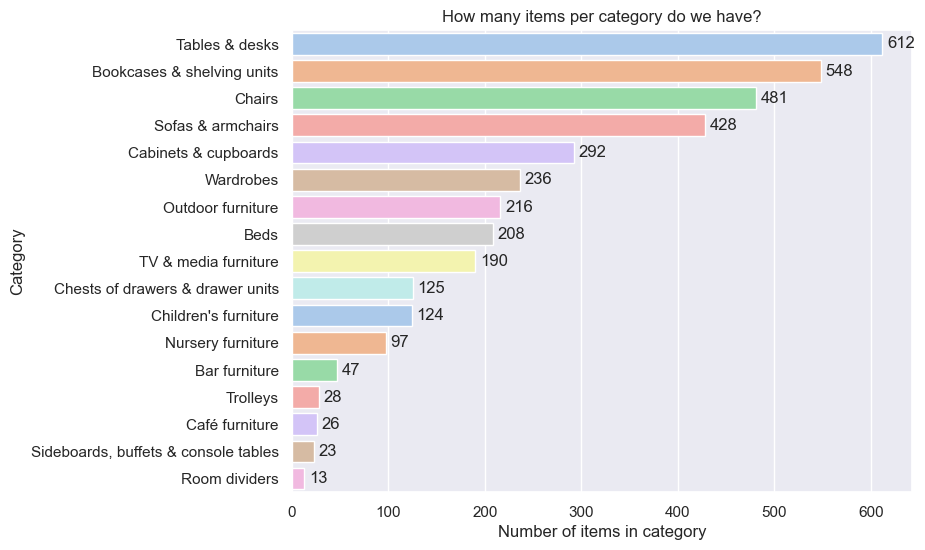

In [31]:
# 1. Which category has the highest amount of items?
category_counts = ikea_ds['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

category_counts = category_counts.sort_values('count', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=category_counts, y='category', x='count', ci=None, palette='pastel')
for i, count in enumerate(category_counts['count']):
    plt.text(count + 5, i, f'{count}', va='center')

plt.xlabel('Number of items in category')
plt.ylabel('Category')
plt.title('How many items per category do we have?')
plt.show()

# As we can see from the graph, category 'Tables & desks' has the highest number of items in it, while 'Room Dividers' - the lowest.

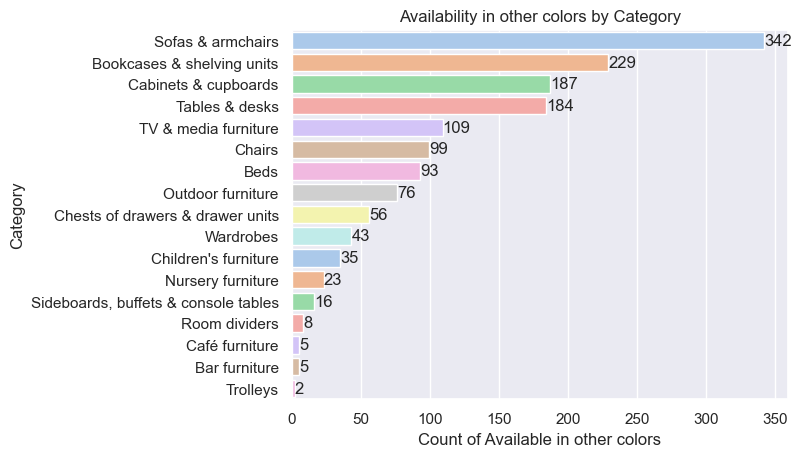

In [32]:
# 3 How many item in each category are available in other colors?
group=ikea_ds.groupby('category')['other_colors_bool'].sum().sort_values(ascending=False)
sns.barplot(x=group.values, y=group.index, palette='pastel')
for i, count in enumerate(group.values):
    plt.text(count + 0.1, i, f'{count}', va='center')
plt.xlabel('Count of Available in other colors')
plt.ylabel('Category')
plt.title('Availability in other colors by Category')
plt.show()

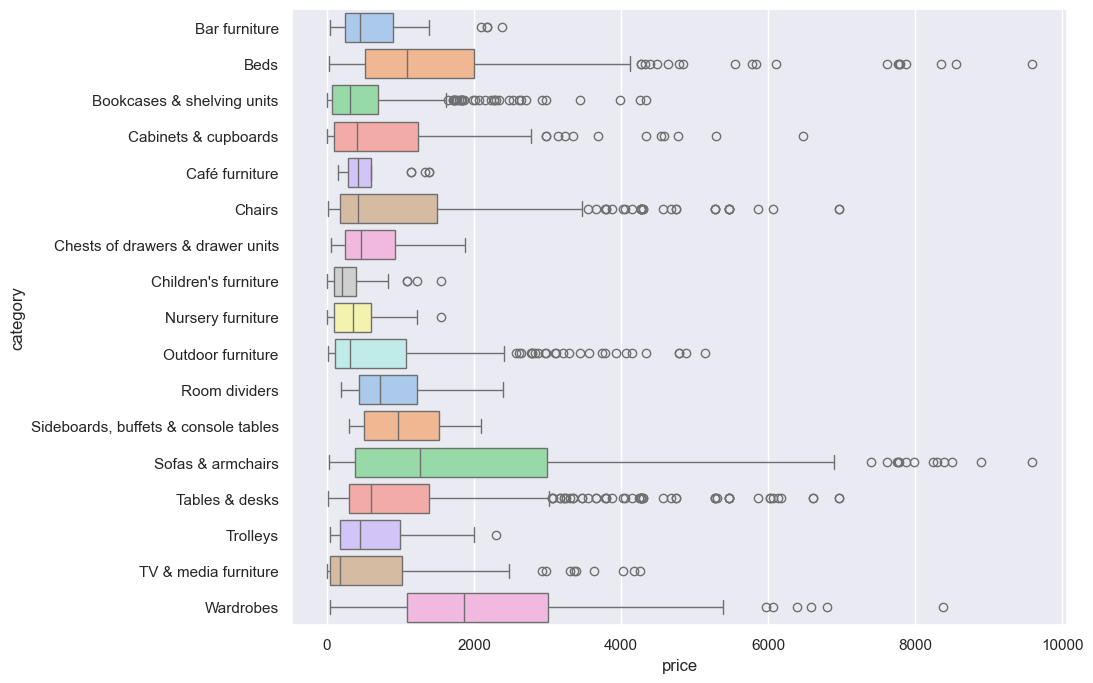

In [33]:
# the distribution of prices across different categories in the IKEA dataset, allowing for easy comparison of price ranges within each category
plt.subplots(figsize = (10,8))
sns.boxplot(data = ikea_ds, x = 'price', y = 'category', palette='pastel')
plt.show()

# Based on the graph we see that the most expensive items belong to 'Beds' and 'Sofas & armchairs' categories, while 'Cafe furniture', 'children furniture' and 'nursery furniture' own the cheapest items.

In [34]:
# Maximum for items per category, which are available in other colors and not.
ikea_ds.groupby(['category', 'other_colors'])['price'].max()

category                              other_colors
Bar furniture                         No              2375.0
                                      Yes              595.0
Beds                                  No              7873.0
                                      Yes             9585.0
Bookcases & shelving units            No              4335.0
                                      Yes             4260.0
Cabinets & cupboards                  No              4335.0
                                      Yes             6480.0
Café furniture                        No              1385.0
                                      Yes             1140.0
Chairs                                No              6965.0
                                      Yes             2700.0
Chests of drawers & drawer units      No              1880.0
                                      Yes             1860.0
Children's furniture                  No              1095.0
                                  

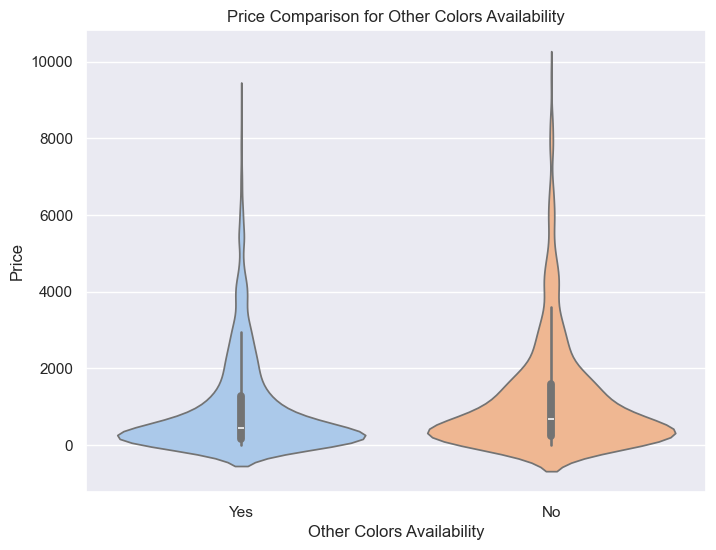

In [35]:
# Price Comparison for Other Colors Availability 
plt.figure(figsize=(8, 6))
sns.violinplot(x='other_colors', y='price', data=ikea_ds, palette='pastel')
plt.gca().set_xticklabels(['Yes', 'No'])
plt.title('Price Comparison for Other Colors Availability')
plt.xlabel('Other Colors Availability')
plt.ylabel('Price')
plt.show()

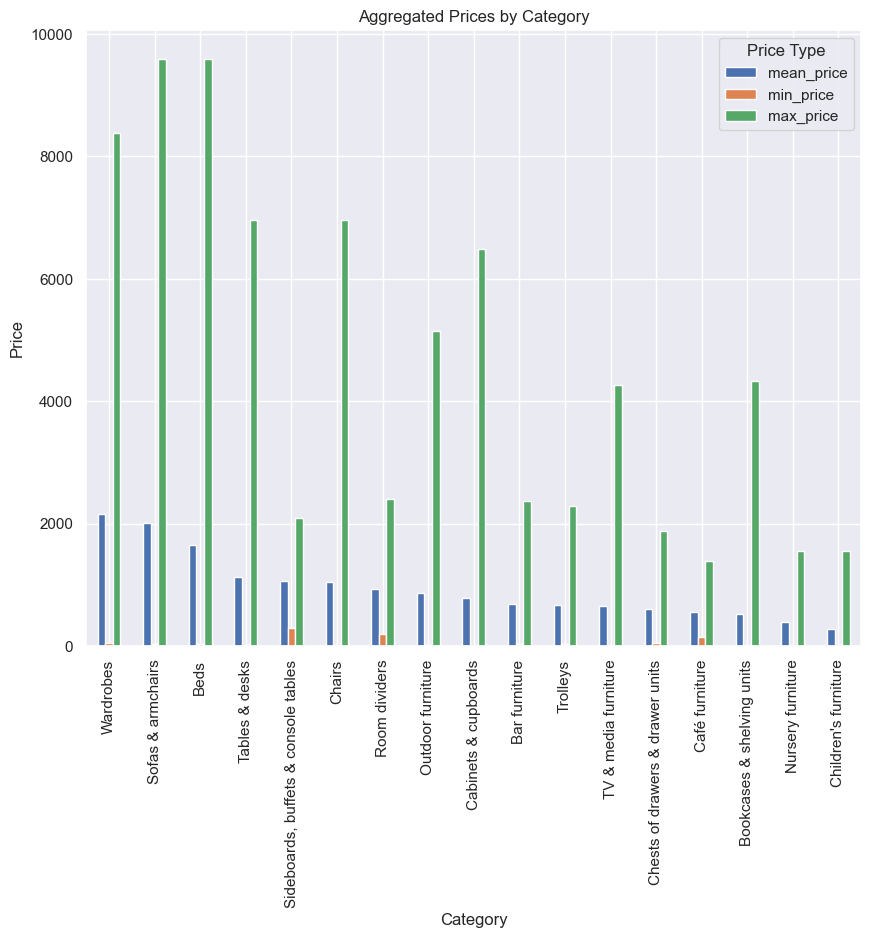

In [36]:
# Find min, max and average price values per category
agg_stat=ikea_ds.groupby('category').agg(
    mean_price=('price', lambda x: round(x.mean(), 2)),
    min_price=('price', 'min'),
    max_price=('price', 'max')
).sort_values(['mean_price'], ascending=[False])

agg_stat.plot(kind='bar', figsize=(10, 8))
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Aggregated Prices by Category')
plt.legend(title='Price Type')
plt.show()

# This graph shows us the comparison of min, max and average prices per category. And here is an interesting situation:  for every category there is a beg difference between max and min values. 
# In fact, for majority of categories min values are not even properly displayed on the graph. Max values look like outliers, because average values are much lower than max, which drives to a conclusion
# that max values do not appear often and without them the average price might be more accurate.

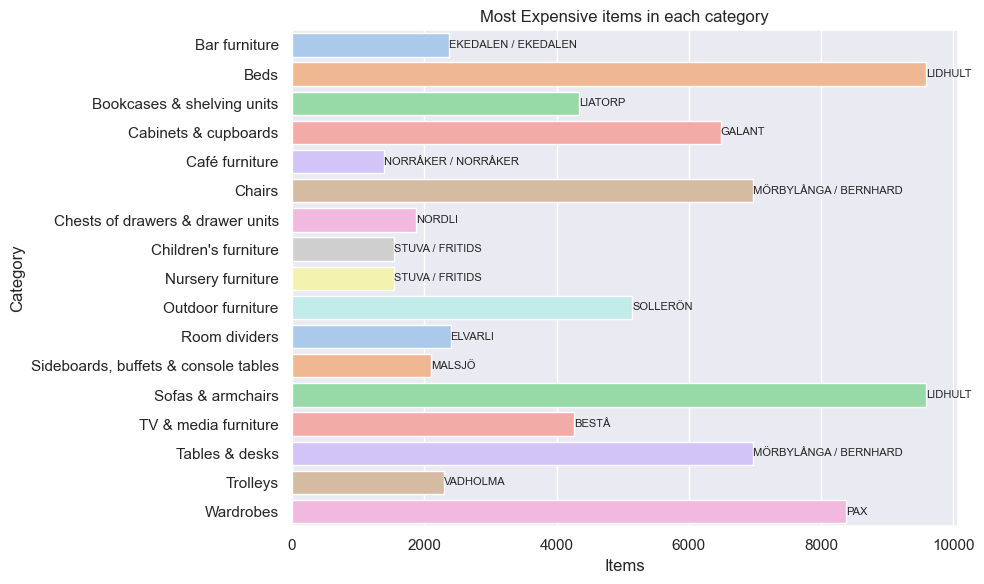

In [37]:
# Displaying Most expensive items per category
most_expensive = ikea_ds.groupby('category')['price'].idxmax()
result = ikea_ds.loc[most_expensive, ['category', 'name', 'price']]

plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='category', data=result, palette='pastel')
plt.xlabel('Items')
plt.ylabel('Category')
plt.title('Most Expensive items in each category')
plt.tight_layout()

for i, (_, row) in enumerate(result.iterrows()):
    plt.text(row['price'], i, row['name'], ha='left', va='center', fontsize=8)

plt.show()


In [73]:
ikea_ds['designer_clean'].value_counts().head(20)

designer_clean
IKEA of Sweden                   971
Ehlén Johansson                  306
Jon Karlsson                     170
Ola Wihlborg                     165
Francis Cayouette                164
K Hagberg/M Hagberg              144
Ebba Strandmark                   96
Henrik Preutz                     87
Carina Bengs                      85
Eva Lilja Löwenhielm              70
Studio Copenhagen                 64
A Fredriksson/H Preutz            60
Marcus Arvonen                    60
Nike Karlsson                     56
E Lilja Löwenhielm/K Malmvall     55
Tord Björklund                    54
Gillis Lundgren                   44
Carl Öjerstam                     41
David Wahl                        37
Johan Kroon                       31
Name: count, dtype: int64

Let's check, which Ikea designers contributed the most. To check this we will see what names appearing the most frequently in the column. Such as we have a lot of 'Ikea of Sweden' values, we will exclude them from this research, as it is a default value for fields, where designer's name wasn't mentioned.

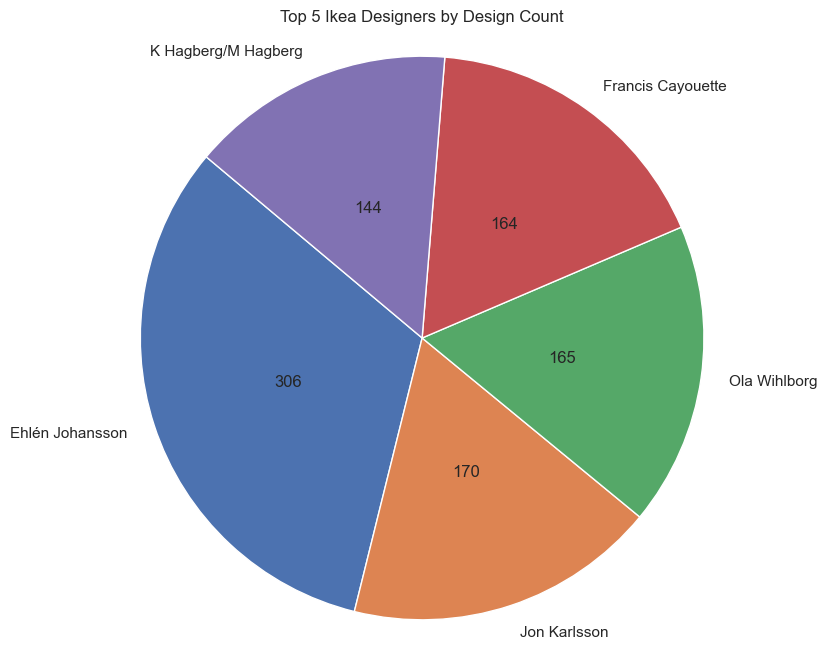

In [78]:

designer_counts = ikea_ds['designer_clean'].value_counts()
top_designers_excluding_first = designer_counts.index[1:].tolist()
top_designers = designer_counts[top_designers_excluding_first].head(5)

designer_df = pd.DataFrame({'designer': top_designers.index, 'design_count': top_designers.values})

plt.figure(figsize=(8, 8))
patches, _ = plt.pie(designer_df['design_count'], labels=top_designers.index, startangle=140)

label_positions = [(patch.theta2 + patch.theta1) / 2 for patch in patches]

for i, (patch, position) in enumerate(zip(patches, label_positions)):
    count = designer_df['design_count'].iloc[i]
    x = patch.r * 0.5 * np.cos(np.pi * position / 180) + patch.center[0]
    y = patch.r * 0.5 * np.sin(np.pi * position / 180) + patch.center[1]
    plt.text(x, y, f"{count}", ha='center', va='center')

plt.title('Top 5 Ikea Designers')
plt.axis('equal')
plt.show()


And we can see, that the most frequently mentioned, i.e. contributed the most is Ehlen Johansson, followed by Jon Karlsson, Ola Wihlborg, Francis Cayouette and K Hagberg/ M Hagberg respectfully.

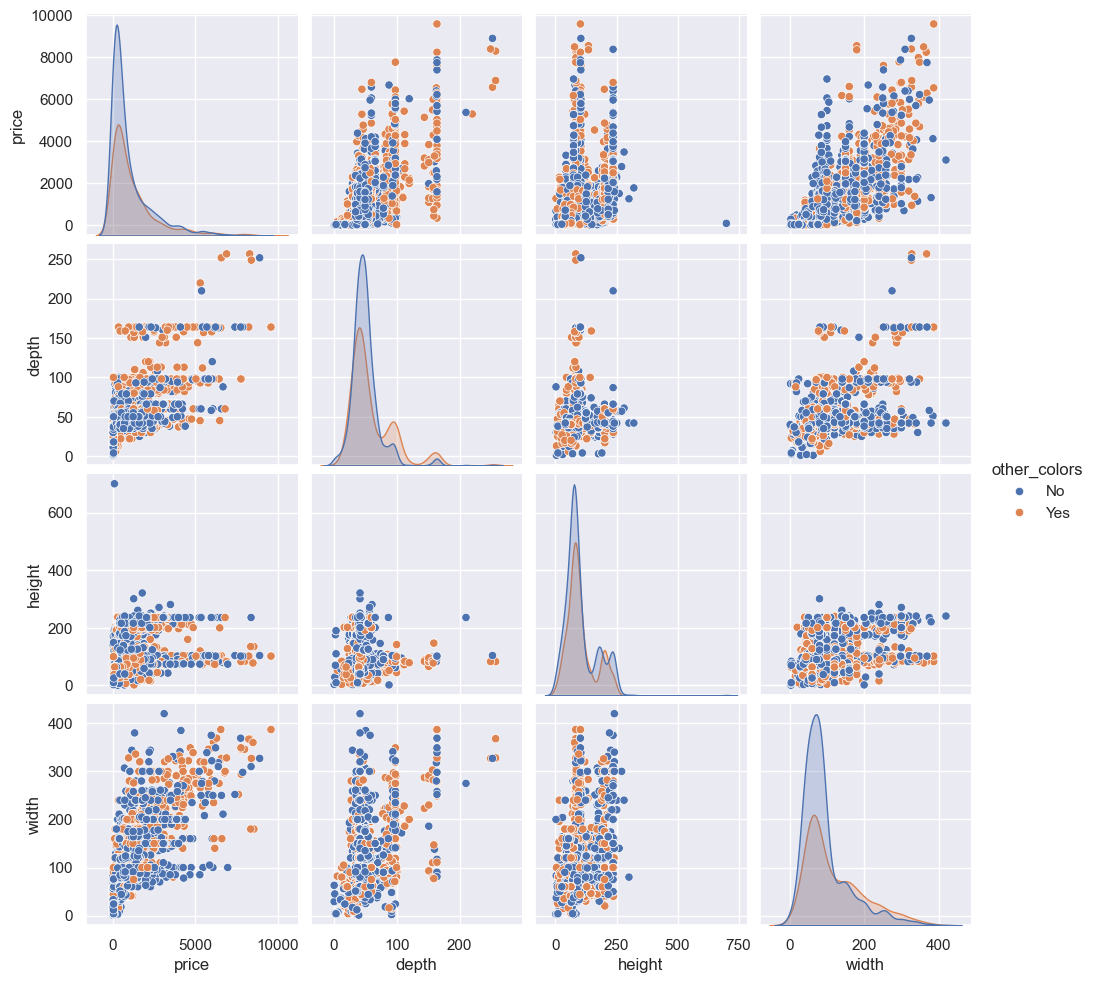

In [38]:
sns.pairplot(ikea_ds[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

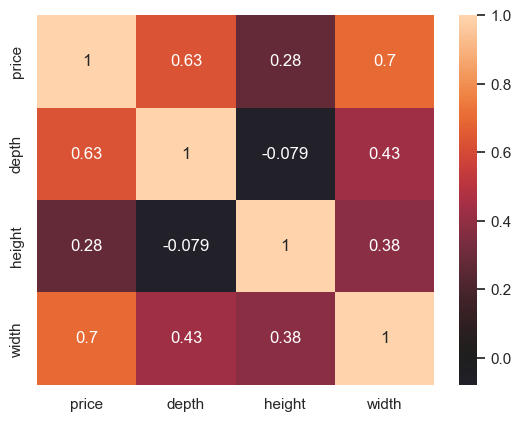

In [39]:
# Correlation matrix  with NaN values
sns.heatmap(ikea_ds[['price', 'depth', 'height', 'width']].corr(), xticklabels= ikea_ds[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= ikea_ds[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

# While keeping in mind that correlation analysis shows the exstiance or absence of the connection between certain values, we see that the highest correlation is between 'width' and 'price' and between
# 'depth' and price'. This means that those values are definitely connected somehow, but due to the specifics of the correlation analysis, we can't state that there is some dependence between those values.
# On the contrary, the rest of pairs have very low (under 0,5) correlation coeficient, so we may conclude that no evident connection between values were found.

# This analysis was performed on the columns with NaN values. See a bit later how the result will change after filling the missing data.

2.3. Removing duplicates
1. Creating the subset, which excludes columns affecting the uniqueness of the original dataset: category and Unnamed:0; also the original column 'other_colors' was removed, leaving instead the column with the changed datatype: other_colors_bool, 'designer' column removed, leaving the 'designer_clean' column
2. Checking the number of duplicates and dropping them.
3. Scaling the 'price' column


As it was mentioned earlier, in 1.4., some item_ids are duplicated because the same item_id is assigned to several categories. If we remove the duplicates based on item_id column, we may affect the category column values, such as we don't know to which exact catogery the item should be assigned, when it is present, for instance, in 4 categories at once. 
The solution may be radical a bit, but it lies in creation of the subset (copy from the one we were working on previously) and removing 'category' column at all. This subset will be used for quantative analysis and forecasting and if the need in usage 'category' appears, we may always refer the previous dataset. 

Along with the 'category' column will be deleted several more unnecessary columns.

In [40]:
# Creation of a new dataset excluding 'category','other_colors', 'designer', 'Unnamed: 0' columns. 
subset_no1=ikea_ds.copy().drop(columns=['category', 'other_colors', 'designer', 'Unnamed: 0'])
subset_no1.head(5)


,item_id,name,price,old_price,sellable_online,link,short_description,depth,height,width,other_colors_bool,designer_clean
0,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,"Bar table, in/outdoor, 51x51 cm",NaN,99.0,51.0,False,Nicholai Wiig Hansen
1,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,"Bar table, 140x80 cm",NaN,105.0,80.0,False,Francis Cayouette
2,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,Bar table and 4 bar stools,NaN,NaN,NaN,False,Francis Cayouette
3,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,"Bar stool with backrest, 74 cm",50.0,100.0,60.0,True,Henrik Preutz
4,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,"Wall-mounted drop-leaf table, ...",60.0,43.0,74.0,False,Marcus Arvonen


In [41]:
subset_no1.duplicated().sum() # 732 duplicate values
subset_no1['item_id'].duplicated().sum() 
#subset_no1[subset_no1['item_id']==79241940]

732

In [42]:
# dropping the duplicates
subset_no1.drop_duplicates(inplace=True)

In [43]:
# duplicate check - there are 0 duplicates now and subset is ready for the further analysis.
subset_no1.duplicated().sum() # 0 
subset_no1.sample(5)
subset_no1.shape

(2962, 12)

SCALING of the price column

If rollback a bit to the graphs showing the distribution of price per category and min/max/mean values per category, we may assume the existance of outliers in the price column. In this case the column may be normalized by two ways: standard scaler and min/max scaler.

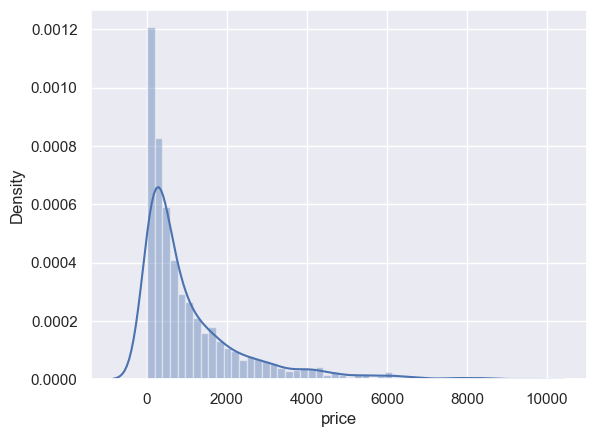

In [44]:
# But firstly let's see the original 'price' column dynamics
sns.distplot(subset_no1['price']); # graph on unscaled subset

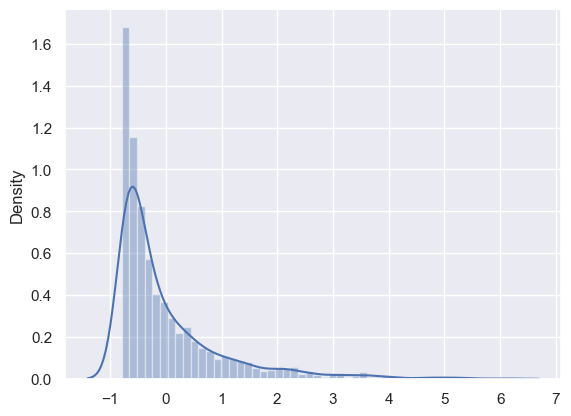

In [45]:
# Now the first option of normalizing: Standard scaling
scaler = StandardScaler()

scaled_features = scaler.fit_transform(subset_no1[['price']])

scaled_features[:10]

sns.distplot(scaled_features);

[[0.02734293]
 [0.10352745]
 [0.21832603]
 [0.00688791]
 [0.02316844]
 [0.03569192]
 [0.01314966]
 [0.02003757]
 [0.01314966]
 [0.22677938]]


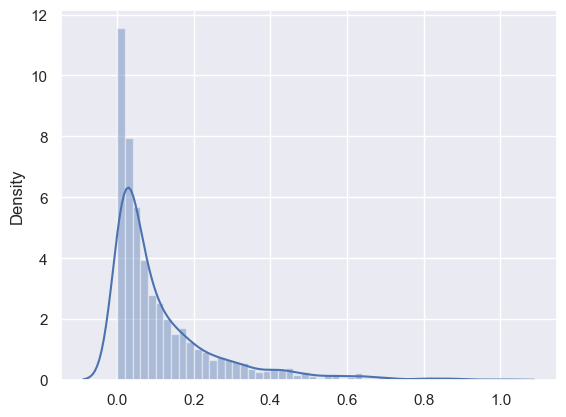

In [46]:
# Second option: MIN/MAX scaling
selected_minmax = subset_no1[['price']]

scaler = MinMaxScaler()

scaled_minmax = scaler.fit_transform(selected_minmax)

print(scaled_minmax[:10])
sns.distplot(scaled_minmax);

Seeing the reults of scaling it is obvious that no visible difference were made, data still displayed with the same distribution. 
 Thus, in this case scaling was unnecessary as it didn't bring any visible change.

2.4. FILLING the absent data for depth, height and width columns


Simple Imputer was choosed for filling in the missing data; strategy - 'most_frequent'. It should be said, that the most accurate way to fill in the missing values is manual - a lot of, if not all, missing values are present in the neiqghbour column 'short_description'. But manual data insertion would take a lot of time due to the dataset length, so it was decided to use another tool, Simple Imputer in our case.

In [47]:
# SimpleImputer
mis_col = ['depth', 'height', 'width']

imputer = SimpleImputer(strategy='most_frequent')
subset_no1[mis_col] = imputer.fit_transform(subset_no1[mis_col])

In [48]:
subset_no1.sample(10)

,item_id,name,price,old_price,sellable_online,link,short_description,depth,height,width,other_colors_bool,designer_clean
2120,29303624,SOLLERÖN,2832.0,No old price,True,https://www.ikea.com/sa/en/p/solleroen-3-seat-...,"3-seat modular sofa, outdoor",144.0,84.0,223.0,True,Jonas Hultqvist
16,40426138,HENRIKSDAL,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,"Bar stool with backrest frame, ...",51.0,102.0,40.0,False,Karl Malmvall
1441,79912760,NORBERG / NISSE,324.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-nisse-tab...,"Table and 1 chair, 74 cm",60.0,74.0,74.0,False,Lisa Norinder/Marcus Arvonen
2283,69254810,GRÖNLID,6575.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,"U-shaped sofa, 6 seat",252.0,104.0,327.0,True,Ehlén Johansson/Francis Cayouette
3520,29167037,PAX,2450.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-whit...,"Wardrobe, 200x44x236 cm",44.0,236.0,200.0,False,Ehlén Johansson
2449,90409457,VIMLE,100.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-cover-for-a...,Cover for armrest,40.0,74.0,60.0,True,Ehlén Johansson
82,80017389,SANDVIKA,295.0,No old price,True,https://www.ikea.com/sa/en/p/sandvika-guest-be...,"Guest bed, 80x190 cm",40.0,34.0,80.0,False,IKEA of Sweden
2413,89259939,DELAKTIG,275.0,No old price,True,https://www.ikea.com/sa/en/p/delaktig-backrest...,Backrest with cushion,25.0,33.0,60.0,True,Tom Dixon
2178,105064,LIATORP,445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,"Console table, 133x37 cm",40.0,75.0,37.0,False,Carina Bengs
78,69185435,KRITTER,360.0,No old price,True,https://www.ikea.com/sa/en/p/kritter-bed-frame...,"Bed frame with slatted bed base, ...",40.0,74.0,75.0,False,Anna Efverlund


In [49]:
round(ikea_ds.groupby('category')['depth'].mean(),2)

category
Bar furniture                            46.93
Beds                                     81.73
Bookcases & shelving units               36.92
Cabinets & cupboards                     37.49
Café furniture                           44.79
Chairs                                   60.68
Chests of drawers & drawer units         47.16
Children's furniture                     44.52
Nursery furniture                        43.09
Outdoor furniture                        68.22
Room dividers                            40.50
Sideboards, buffets & console tables     41.10
Sofas & armchairs                       106.32
TV & media furniture                     37.15
Tables & desks                           52.81
Trolleys                                 49.78
Wardrobes                                55.60
Name: depth, dtype: float64

* Displaying the difference in 'depth', 'height' and 'width' distribution before and after data filling

We can otally see how different is data distribution before and after data filling. Before it seems to be more volumetric, distributed on a bigger area, while after it looks flatter, agglomerated together on the sheet, and leaving one obvious outlier.

Text(0.5, 0.92, '3D Scatter Plot of Height, Width, and Depth')

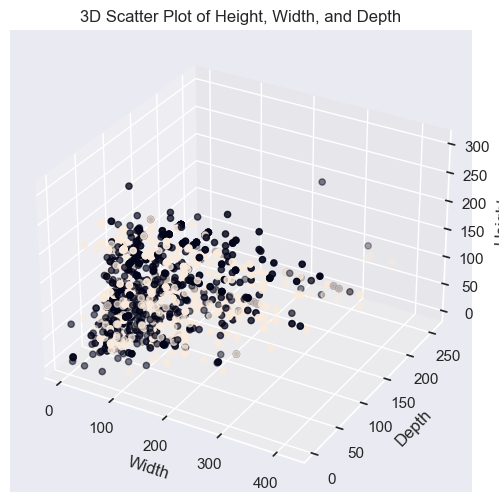

In [51]:
# Distribution of 'depth', 'height' and 'width' values BEFORE data filling.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ikea_ds['width'], ikea_ds['depth'], ikea_ds['height'], c=ikea_ds['other_colors_bool'], marker='o')
ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')
ax.set_title('3D Scatter Plot of Height, Width, and Depth')

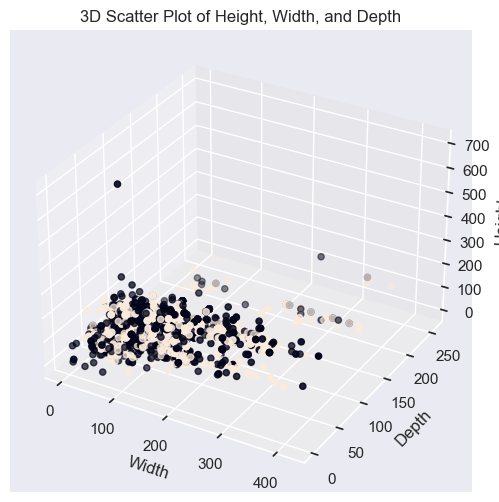

In [52]:
# Distribution of 'depth', 'height' and 'width' values AFTER data filling.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset_no1['width'], subset_no1['depth'], subset_no1['height'], c=subset_no1['other_colors_bool'], marker='o')
ax.set_title('3D Scatter Plot of Height, Width, and Depth')
ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')
plt.show()


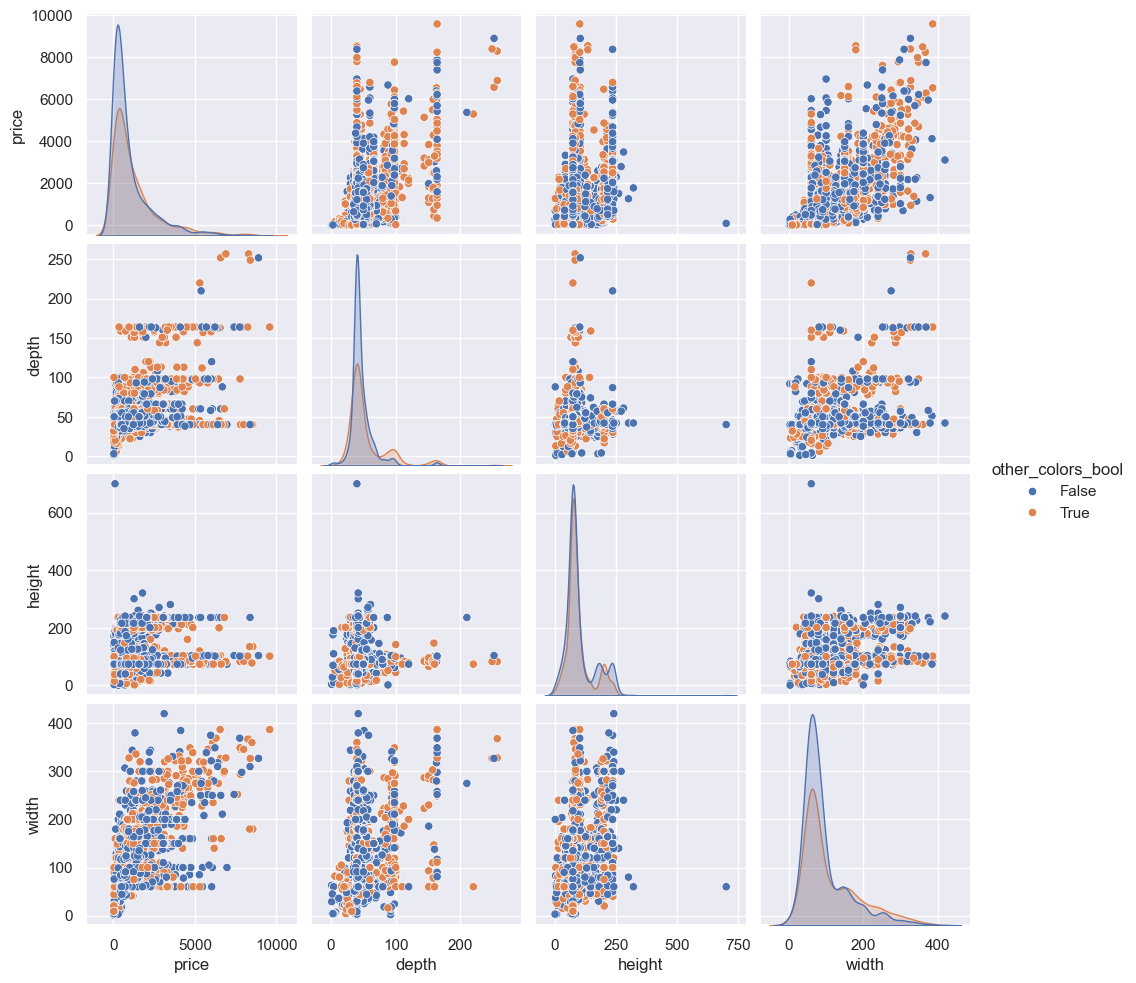

In [53]:
# In this pairplot we will more closely look how data is distributed after it was fiiled in. 
sns.pairplot(subset_no1[['price', 'depth', 'height', 'width', 'other_colors_bool']], hue = 'other_colors_bool');

Earlier the correlation heatmap was performed on the data, having NaN values. Now we are using subset_no1 with filled data. 
Although, we may see the difference in correlation coeficients returned, the pairs with strong connection are the same: 'price'/'width' and 'price'/'depth'. Although the coeficient itself is lower, we still can consider those pairs as the most suitable for further analysis or predictions. The lowest connection, as before, in 'height'/'depth' pair, which makes it irrelevant for any other considerations.  

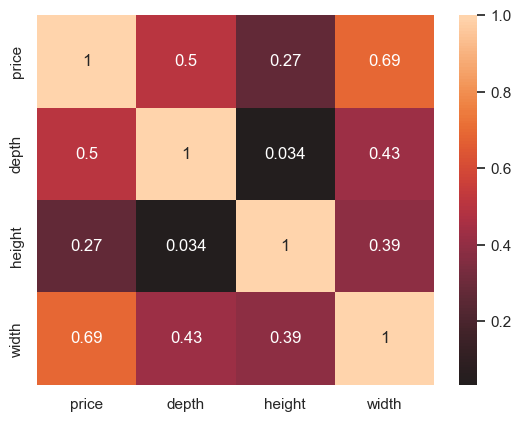

In [54]:
sns.heatmap(subset_no1[['price', 'depth', 'height', 'width']].corr(), xticklabels= subset_no1[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= subset_no1[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

But when using the other correlation method, Spearman, we can see that the results are even worse, as it was before in both cases, leaving us with the only pair which has strong connection and it is 'price'/'width'. 

Considering these three correlation heatmaps, we may suggest that there is a strong connection, which further may e used for dependency exploration, between 'price' and 'width' and this pair is great for performing other actions on, for examle, regression analysis. 

In [55]:
ikea_X = subset_no1[['height', 'width', 'depth', 'price']]

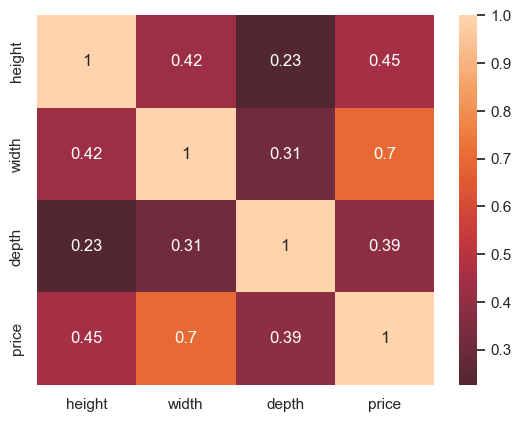

In [56]:
# spearman
sns.heatmap(ikea_X.corr(method= 'spearman'), xticklabels= ikea_X.corr().columns,
            yticklabels= ikea_X.corr().columns, center= 0, annot= True);

# PART 3
Pipeline, Bestregressor, GridSearchCV

For the first copy_dataset 'ikea_ds', on which we were working on in the part 2 (Basic stat and analysis) we will use Pipeline to fill the missing data, transform values and build model. 

In [57]:
X = ikea_ds[['depth', 'width', 'height', 'designer_clean', 'other_colors']]
Y = ikea_ds['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='most_frequent'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.71987
MAE : 411.87773
MSE : 734.81031


As we may see, coeficient of determination (R^2) shows pretty good result - roughly 0,72. That means, that the model explains about 72% of the variability in the data, which is a moderately good fit.
However, there is still room for improvement as indicated by the MAE and MSE, suggesting that there are still considerale errors in prediction that could be addressed to enhance the model's accuracy. 

Now we are checking the data after Pipeline insertion and see that there are still NaN values. This issue demands further exploration and solving.

In [58]:
ikea_ds.sample(10) # as we may see, missing data wasn't filled in the columns 'depth', 'height' and 'width'

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_bool,designer_clean
1186,1186,79129081,EKTORP,Chairs,675.0,No old price,True,https://www.ikea.com/sa/en/p/ektorp-armchair-l...,Yes,Armchair,IKEA of Sweden,88.0,88.0,104.0,True,IKEA of Sweden
3194,3194,39305161,NORDVIKEN / HENRIKSDAL,Tables & desks,2675.0,No old price,True,https://www.ikea.com/sa/en/p/nordviken-henriks...,No,"Table and 4 chairs, 152/223x9...",Francis Cayouette/IKEA of Sweden,NaN,NaN,95.0,False,Francis Cayouette
2241,2241,69298772,VIMLE,Sofas & armchairs,2610.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-3-seat-sofa...,Yes,3-seat sofa,Ehlén Johansson,98.0,83.0,241.0,True,Ehlén Johansson
371,371,40309573,STUK,Bookcases & shelving units,35.0,No old price,True,https://www.ikea.com/sa/en/p/stuk-storage-case...,No,"Storage case, 55x51x18 cm",IKEA of Sweden,51.0,18.0,55.0,False,IKEA of Sweden
815,815,30439565,SYVDE,Cabinets & cupboards,595.0,No old price,True,https://www.ikea.com/sa/en/p/syvde-cabinet-wit...,No,"Cabinet with glass doors, 100...",IKEA of Sweden,48.0,123.0,100.0,False,IKEA of Sweden
786,786,39311789,JONAXEL,Bookcases & shelving units,950.0,SR 977,True,https://www.ikea.com/sa/en/p/jonaxel-frame-mes...,No,"Frame/mesh baskts/clths rl/shlv uts, ...",IKEA of Sweden,51.0,207.0,173.0,False,IKEA of Sweden
3596,3596,79161617,ELVARLI,Wardrobes,2176.0,"SR 2,565",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 218x51x222-350 cm",Ehlén Johansson,50.0,NaN,218.0,False,Ehlén Johansson
2984,2984,29304223,EKEDALEN / EKEDALEN,Tables & desks,2375.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,"Bar table and 4 bar stools, 1...",Ehlén Johansson,NaN,NaN,NaN,False,Ehlén Johansson
2766,2766,10346077,ANVÄNDBAR,Tables & desks,476.0,SR 595,True,https://www.ikea.com/sa/en/p/anvaendbar-table-...,No,"Table, 180x98 cm",Mikael Axelsson,NaN,74.0,98.0,False,Mikael Axelsson
2880,2880,49215693,LINNMON / GODVIN,Tables & desks,275.0,No old price,True,https://www.ikea.com/sa/en/p/linnmon-godvin-ta...,No,"Table, 150x75 cm",IKEA of Sweden,NaN,74.0,75.0,False,IKEA of Sweden


In the next step we will use 'getBestRegressor' function to compare different prediction models and choose the best one. This will be performed on the dataset with filled data, but without the 'category' column, 'subset_no1'. 

In [59]:
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [60]:

X1 = subset_no1[['width','depth','height']]
Y1 = subset_no1['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.72232,435.59248,723.18984
DecisionTreeRegressor,0.64927,495.56467,812.77047
GradientBoostingRegressor,0.63101,534.23467,833.66618
KNeighborsRegressor,0.56148,577.97179,908.81753
LassoCV,0.47211,646.61199,997.13436
LinearRegression,0.47194,646.64881,997.29874
RidgeCV,0.47194,646.64878,997.29864
SVR,0.43509,613.79320,1031.50979


Among these models, RandomForestRegressor has the highest R^2 score and the lowest MSE and RMSE, indicating that it might perform the best in fitting the data and making predictions, followed by DecisionTreeRegressor, GradientBoostingRegressor, and KNeighborsRegressor, in that order.

In [61]:

# Use  GridSearchCV for tunning model 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_features='log2', n_estimators=110)
Best Score     : 0.7310191386156539

R^2            : 0.73009
MAE            : 427.07374
RMSE           : 713.00607

Feature importance:
--------------------------------
0.52137    width
0.25423    depth
0.22440    height


Best Score 0.73 and R^2 value of 0.73009 again confirm that approximately 73% of the variance in the target variable is explained by the independent variables in our model. Which is a very good result.
From the Feature Importance field we can see that the most influensive feature is 'width'. Returning back to our correlation maps we may confirm that this feature definitely has the biggest influence onto the 'price' values. 

Now we'll use the copy of dataset 'ikea_ds' and fill it with the missing data. But, unlike the 'subset_no1', this insertion will be performed on the category groupby basis, i.e. the program will fill the missing values with the most frequent ones (mode) in a certain item category with the purpose of making the data insertion more reliable and relevant. 
In other words, this code is resetting the index of the DataFrame, identifying specific columns with missing values, initializing an imputer to fill missing values with the most frequent value within each category, applying this imputation to the specified columns grouped by 'category', and finally resetting the index of the updated DataFrame.







In [62]:
ikea_ds1=ikea_ds.copy()

In [63]:

ikea_ds1 = ikea_ds1.reset_index(drop=True)

mis_columns = ['depth', 'height', 'width']

imputer = SimpleImputer(strategy='most_frequent')

def impute_group(group):
    group[mis_col] = imputer.fit_transform(group[mis_columns])
    return group

ikea_ds1 = ikea_ds1.groupby('category').apply(impute_group)
ikea_ds1.reset_index(drop=True, inplace=True)


In [69]:
ikea_ds1.sample(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_bool,designer_clean
885,885,295554,BESTÅ,Cabinets & cupboards,25.0,No old price,True,https://www.ikea.com/sa/en/p/besta-shelf-white...,Yes,"Shelf, 56x36 cm",IKEA of Sweden,36.0,64.0,56.0,True,IKEA of Sweden
2400,2400,69278415,GRÖNLID,Sofas & armchairs,4390.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-3-seat-s...,Yes,3-seat sofa-bed,Francis Cayouette/Ehlén Johansson/IKEA of Sweden,98.0,104.0,267.0,True,Ehlén Johansson/Francis Cayouette
1847,1847,19252615,LANGUR,Children's furniture,235.0,No old price,True,https://www.ikea.com/sa/en/p/langur-junior-cha...,No,Junior chair,J Fritzdorf/J Feldman/J Hedberg,61.0,82.0,56.0,False,J Feldman/J Fritzdorf/J Hedberg
501,501,10265293,BILLY,Bookcases & shelving units,30.0,No old price,True,https://www.ikea.com/sa/en/p/billy-extra-shelf...,Yes,"Extra shelf, 36x26 cm",IKEA of Sweden,26.0,179.0,36.0,True,IKEA of Sweden
321,321,70302283,BRUSALI,Bookcases & shelving units,237.0,SR 395,True,https://www.ikea.com/sa/en/p/brusali-bookcase-...,No,"Bookcase, 67x190 cm",IKEA of Sweden,33.0,190.0,67.0,False,IKEA of Sweden
1282,1282,90363553,JÄRVFJÄLLET,Chairs,845.0,No old price,True,https://www.ikea.com/sa/en/p/jaervfjaellet-off...,Yes,Office chair,Eva Lilja Löwenhielm,68.0,74.0,68.0,True,Eva Lilja Löwenhielm
916,916,295530,BESTÅ,Cabinets & cupboards,25.0,No old price,True,https://www.ikea.com/sa/en/p/besta-glass-shelf...,No,"Glass shelf, 56x16 cm",IKEA of Sweden,16.0,64.0,56.0,False,IKEA of Sweden
2777,3417,60323592,BILLSBRO,TV & media furniture,15.0,No old price,True,https://www.ikea.com/sa/en/p/billsbro-handle-s...,No,"Handle, 40 mm",H Preutz/A Fredriksson,42.0,64.0,60.0,False,A Fredriksson/H Preutz
1781,1781,29228470,TROFAST,Children's furniture,365.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-storage-c...,Yes,"Storage combination, 99x44x56 cm",Studio Copenhagen,44.0,56.0,99.0,True,Studio Copenhagen
2528,2528,29894377,KIVIK,Sofas & armchairs,6160.0,"SR 7,700",True,https://www.ikea.com/sa/en/p/kivik-3-seat-sofa...,No,3-seat sofa,Ola Wihlborg,163.0,83.0,280.0,False,Ola Wihlborg


Keeping in mind, how the data was distributed before and after insertion in Part 2, let's check the distribution after the data was filled due to the category. 
And we can see that although the filling approach was different, referring to the items category, the data is distributed in a very similar way as in the 'subset_no1', making both approaches for filling data reliable and convenient for usage. 

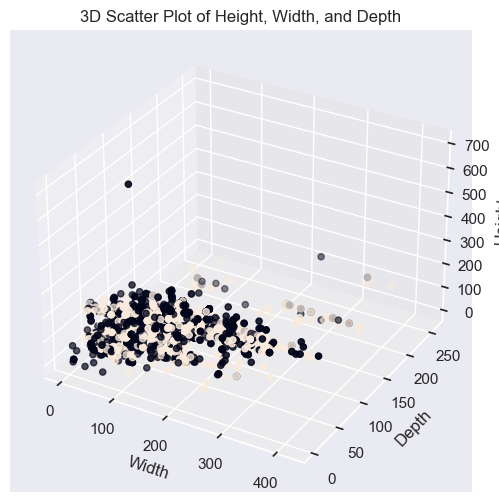

In [65]:
# Distribution of 'depth', 'height' and 'width' values AFTER data filling.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ikea_ds1['width'], ikea_ds1['depth'], ikea_ds1['height'], c=ikea_ds1['other_colors_bool'], marker='o')
ax.set_title('3D Scatter Plot of Height, Width, and Depth')
ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')
plt.show()

In [66]:
X2 = ikea_ds1[['width','depth','height']]
Y2 = ikea_ds1['price']

test2 = getBestRegressor(X2, Y2)
test2['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.76315,375.61520,659.41347
DecisionTreeRegressor,0.71638,433.04567,721.59263
GradientBoostingRegressor,0.69584,463.34410,747.26494
KNeighborsRegressor,0.63740,487.89740,815.89618
LinearRegression,0.40531,653.99376,1044.88137
RidgeCV,0.40531,653.99383,1044.88142
LassoCV,0.40520,654.15966,1044.97916
SVR,0.36528,612.05227,1079.47397


After using getBestRegressor on the newly created dataset we may see that the results seem to be slightly better as in the first case, R^2 is higher for the 4 relevant models: the RandomForestRegressor seems to be the best-performing model among those listed (followed by DecisionTreeRegressor, GradientBoostingRegressor, and finally, KNeighborsRegressor, which performs the least accurately on this dataset), as it has the highest R^2 value, indicating it explains the variance in the data the best. Additionally, it has the lowest MAE and RMSE, suggesting it predicts values closer to the actual values compared to other models.

In [67]:
# Use  GridSearchCV for tunning model 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X2, Y2, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_depth=200, max_features='log2')
Best Score     : 0.7765703637994252

R^2            : 0.77540
MAE            : 363.08232
RMSE           : 642.13474

Feature importance:
--------------------------------
0.52440    width
0.23148    depth
0.24412    height


The model exhibits good predictive performance, with an R^2 of 0.77540, indicating that it explains a significant portion of the variance in the data.
The MAE of 363.08232 and RMSE of 642.13474 are relatively low, suggesting that, on average, the model's predictions are close to the actual values and the errors are not too high.
The feature importance indicates that 'width' has the most substantial impact on the predictions, followed by 'height' and then 'depth'. This suggests that variations in 'width' contribute significantly more to the model's predictions compared to the other features.
Overall, this model seems to perform well, explaining a substantial amount of the variance in the target variable, with 'width' being the most influential feature in making predictions.

Once again, although  data distribution in 'subset_no1' and 'ikea_ds1' is pretty similar, BestRegressor and GridsearchCV show better performance for 'ikea_ds1', were data was imputed regarding the most frequent values per category.